In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/sf-scoring/sample_submission.csv
/kaggle/input/sf-scoring/train.csv
/kaggle/input/sf-scoring/test.csv


In [2]:
DATA_DIR = '/kaggle/input/sf-scoring/'
df_train = pd.read_csv(DATA_DIR +'/train.csv')
df_test = pd.read_csv(DATA_DIR +'/test.csv')
sample_submission = pd.read_csv(DATA_DIR+'/sample_submission.csv')

In [3]:
sample_submission.shape

(36349, 2)

In [4]:
df_test.shape

(36349, 18)

In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73799 entries, 0 to 73798
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   client_id         73799 non-null  int64  
 1   app_date          73799 non-null  object 
 2   education         73492 non-null  object 
 3   sex               73799 non-null  object 
 4   age               73799 non-null  int64  
 5   car               73799 non-null  object 
 6   car_type          73799 non-null  object 
 7   decline_app_cnt   73799 non-null  int64  
 8   good_work         73799 non-null  int64  
 9   score_bki         73799 non-null  float64
 10  bki_request_cnt   73799 non-null  int64  
 11  region_rating     73799 non-null  int64  
 12  home_address      73799 non-null  int64  
 13  work_address      73799 non-null  int64  
 14  income            73799 non-null  int64  
 15  sna               73799 non-null  int64  
 16  first_time        73799 non-null  int64 

In [6]:
df_train.head(5)

,client_id,app_date,education,sex,age,car,car_type,decline_app_cnt,good_work,score_bki,bki_request_cnt,region_rating,home_address,work_address,income,sna,first_time,foreign_passport,default
0,25905,01FEB2014,SCH,M,62,Y,Y,0,0,-2.008753,1,50,1,2,18000,4,1,N,0
1,63161,12MAR2014,SCH,F,59,N,N,0,0,-1.532276,3,50,2,3,19000,4,1,N,0
2,25887,01FEB2014,SCH,M,25,Y,N,2,0,-1.408142,1,80,1,2,30000,1,4,Y,0
3,16222,23JAN2014,SCH,F,53,N,N,0,0,-2.057471,2,50,2,3,10000,1,3,N,0
4,101655,18APR2014,GRD,M,48,N,N,0,1,-1.244723,1,60,2,3,30000,1,4,Y,0


In [7]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36349 entries, 0 to 36348
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   client_id         36349 non-null  int64  
 1   app_date          36349 non-null  object 
 2   education         36178 non-null  object 
 3   sex               36349 non-null  object 
 4   age               36349 non-null  int64  
 5   car               36349 non-null  object 
 6   car_type          36349 non-null  object 
 7   decline_app_cnt   36349 non-null  int64  
 8   good_work         36349 non-null  int64  
 9   score_bki         36349 non-null  float64
 10  bki_request_cnt   36349 non-null  int64  
 11  region_rating     36349 non-null  int64  
 12  home_address      36349 non-null  int64  
 13  work_address      36349 non-null  int64  
 14  income            36349 non-null  int64  
 15  sna               36349 non-null  int64  
 16  first_time        36349 non-null  int64 

In [8]:
sample_submission.head(5)

,client_id,default
0,74835,0
1,17527,0
2,75683,0
3,26883,0
4,28862,0


In [9]:
sample_submission.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36349 entries, 0 to 36348
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   client_id  36349 non-null  int64
 1   default    36349 non-null  int64
dtypes: int64(2)
memory usage: 568.1 KB


In [10]:
# ВАЖНО! дря корректной обработки признаков объединяем трейн и тест в один датасет
# df_train['sample'] = 1 # помечаем где у нас трейн
# df_test['sample'] = 0  # помечаем где у нас тест
df_train['train'] = 1 # помечаем где у нас трейн
df_test['train'] = 0  # помечаем где у нас тест
df_test['default'] = 0 # в тесте у нас нет значения default, мы его должны предсказать, по этому пока просто заполняем нулями

data = df_test.append(df_train, sort=False).reset_index(drop=True) # объединяем

In [11]:
data.nunique(dropna=False)

client_id           110148
app_date               120
education                6
sex                      2
age                     52
car                      2
car_type                 2
decline_app_cnt         24
good_work                2
score_bki           102618
bki_request_cnt         40
region_rating            7
home_address             3
work_address             3
income                1207
sna                      4
first_time               4
foreign_passport         2
train                    2
default                  2
dtype: int64

In [12]:
train = df_train
test= df_test
non_default = train["default"].value_counts()[0] # посмотрим на распределение целевой переменной
ratio = non_default / (train.shape[0] - non_default)
print(f"Соотношение классов: {ratio:.1f}\nПроцент недефолтных клиентов: {100 * non_default / train.shape[0]:.1f}")
# видим, что выборка несбалансирована: "хороших" клиентов почти в семь раз больше, чем "плохих"
# значит последних будет труднее определить

Соотношение классов: 6.9
Процент недефолтных клиентов: 87.3


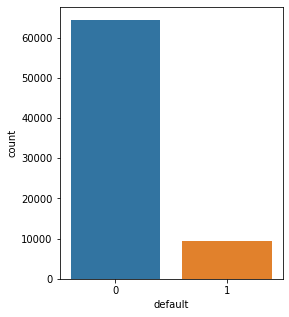

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(4, 5))
ax = sns.countplot(x=train["default"])

In [14]:
def borders(col):
    q1 = col.quantile(.25)
    q3 = col.quantile(.75)
    iqr = q3 - q1
    low = q1 - 1.5 * iqr
    high = q3 + 1.5 * iqr
    return low, high


def check_outliers(col, data):
    """
    Определяет наличие выбросов в признаке col датасета data методом интерквантильного размаха 
    """
    
    low, high = borders(data[col])
    outliers = ((data[col] < low) | (data[col] > high)).sum()
    
    if not outliers:
        print(f"В признаке '{col}' выбросов нет\n")
        return

    print(f"Количество выбросов в признаке '{col}': {outliers}")
    print(f"Границы выбросов: [{low}, {high}]\n")



In [15]:
# modified function from https://towardsdatascience.com/are-you-dropping-too-many-correlated-features-d1c96654abe6
def features_to_drop(df, cut):
    """
    На основании коэффицентов корреляции определяет признаки, которые стоит удалить
    
    df - датафрейм
    cut - пороговое значение коэффициента корреляции
    """

    corr_mtx = df.corr() # создаём корреляционную матрицу
    avg_corr = corr_mtx.mean(axis=1) # считаем среднюю корреляцию по признакам, это будет критерием отбора признаков
    up = corr_mtx.where(np.triu(np.ones(corr_mtx.shape), k=1).astype(bool)) 
    # создаём верхний треугольник матрицы 
    # нижний не несёт дополнительной информации, так как матрица корреляций симметрична

    drop = [] # будущий список признаков для удаления

    for row in range(len(up)-1): # проходимся по всем строкам матрицы
        for col in range(row + 1, len(up)): # проходимся по всем столбцам
            if(abs(corr_mtx.iloc[row, col]) > cut):
                # если корреляция двух текущих признаков больше пороговой,
                # то удалим один из них (тот, у которого средняя корреляция больше)
                if(abs(avg_corr.iloc[row]) > abs(avg_corr.iloc[col])):
                    drop.append(row)
                else:
                    drop.append(col)
                
    dropcols_names = list(df.columns[list(set(drop))])
    if dropcols_names:
        return dropcols_names
    print("Сильноскоррелированных переменных нет")

In [16]:
def calc_f_score(y_true, y_pred):
    """
    считает наибольший f_score при различных порогах отнесения к нулевому и первому классам
    """
    precision, recall, threshold = precision_recall_curve(y_true, y_pred)
    denom = precision + recall 
    denom[denom == 0] = -1
    # если знаменатель f-score равен нулю, то превратим его в -1 (так мы будем отличать этот случай)
    f_score = (2 * precision * recall / denom)[:-1] 
    return f_score, threshold

In [17]:
data.isna().sum()
# пропуски есть только в данных об образовании

client_id             0
app_date              0
education           478
sex                   0
age                   0
car                   0
car_type              0
decline_app_cnt       0
good_work             0
score_bki             0
bki_request_cnt       0
region_rating         0
home_address          0
work_address          0
income                0
sna                   0
first_time            0
foreign_passport      0
train                 0
default               0
dtype: int64

In [18]:
data["education"].value_counts()

SCH    57998
GRD    34768
UGR    14748
PGR     1865
ACD      291
Name: education, dtype: int64

In [19]:
data["education"].fillna(data["education"].mode()[0], inplace=True)
data.isna().sum().sum()

0

In [20]:
# Работа с переменными
# 1. Числовые признаки

#     client_id - идентификатор
#     age - возраст
#     decline_app_cnt - количество отклонённых заявок
#     score_bki - скоринговый балл
#     bki_request_cnt - количество запросов в БКИ
#     region_rating - рейтинг региона
#     income - доход

In [21]:
data["client_id"].nunique() == data.shape[0]
# Видим, что id уникален для каждого клиента, поэтому его можно удалить

True

In [22]:
data.drop("client_id", axis=1, inplace=True)

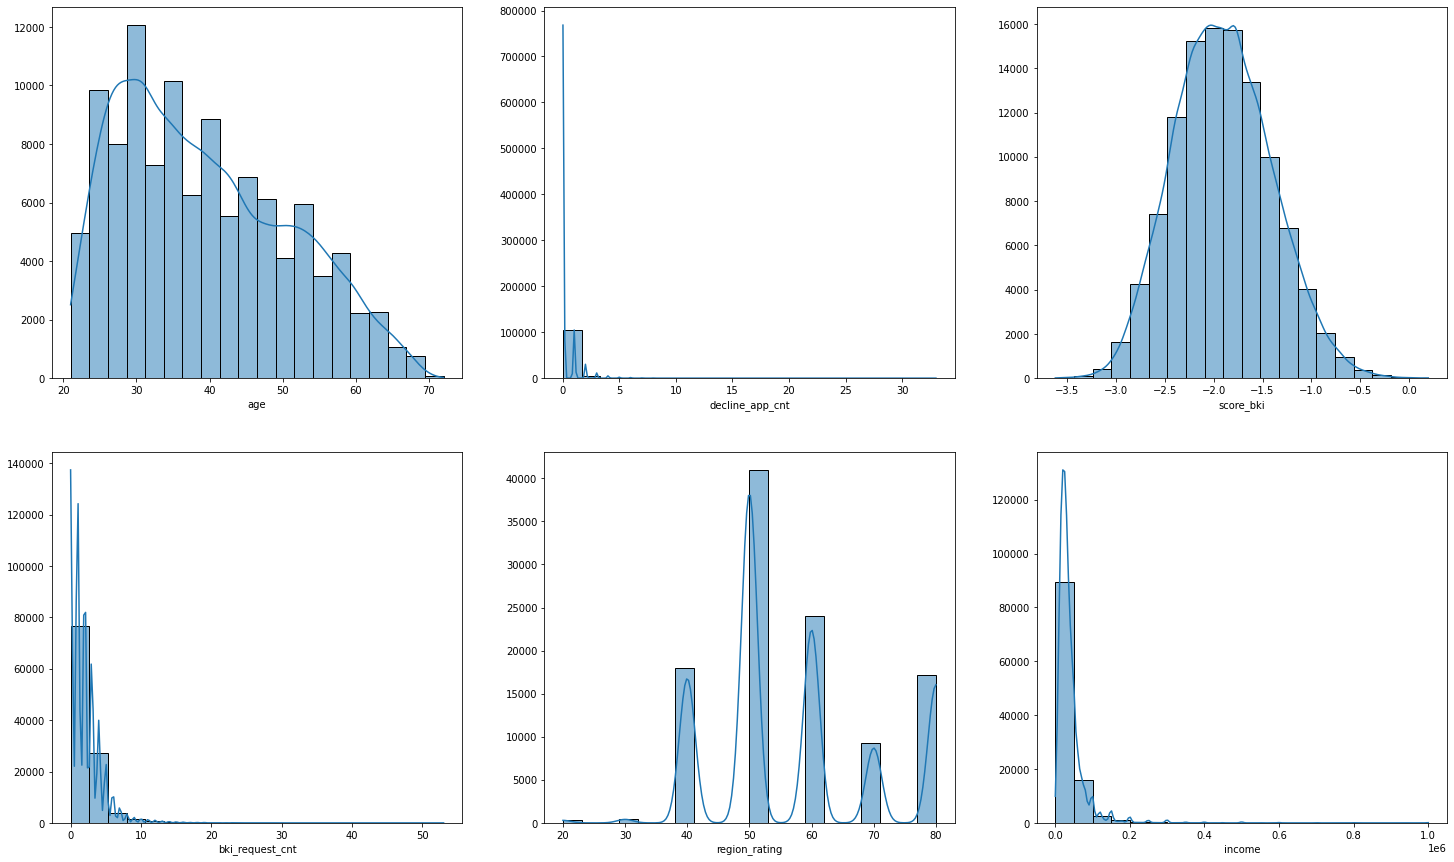

In [23]:
num_cols = ["age", "decline_app_cnt", "score_bki", 
            "bki_request_cnt", "region_rating", "income"]
fig, axes = plt.subplots(2, 3, figsize=(25,15))
for i, col in enumerate(num_cols):
    hist = sns.histplot(data[col], bins=20, kde=True, ax=axes.flat[i])
    hist.set(ylabel="")

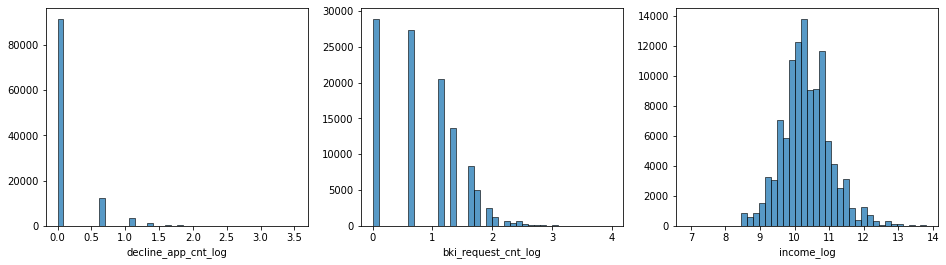

In [24]:
# logarithm
fig, axes = plt.subplots(1, 3, figsize=(16, 4))
for i, col in enumerate(["decline_app_cnt", "bki_request_cnt", "income"]):
    num_cols.append(f"{col}_log")
    data[f"{col}_log"] = np.log(data[col] + 1)
    hist = sns.histplot(data[f"{col}_log"], bins=40, ax=axes.flat[i], kde=False)
    hist.set(ylabel="")

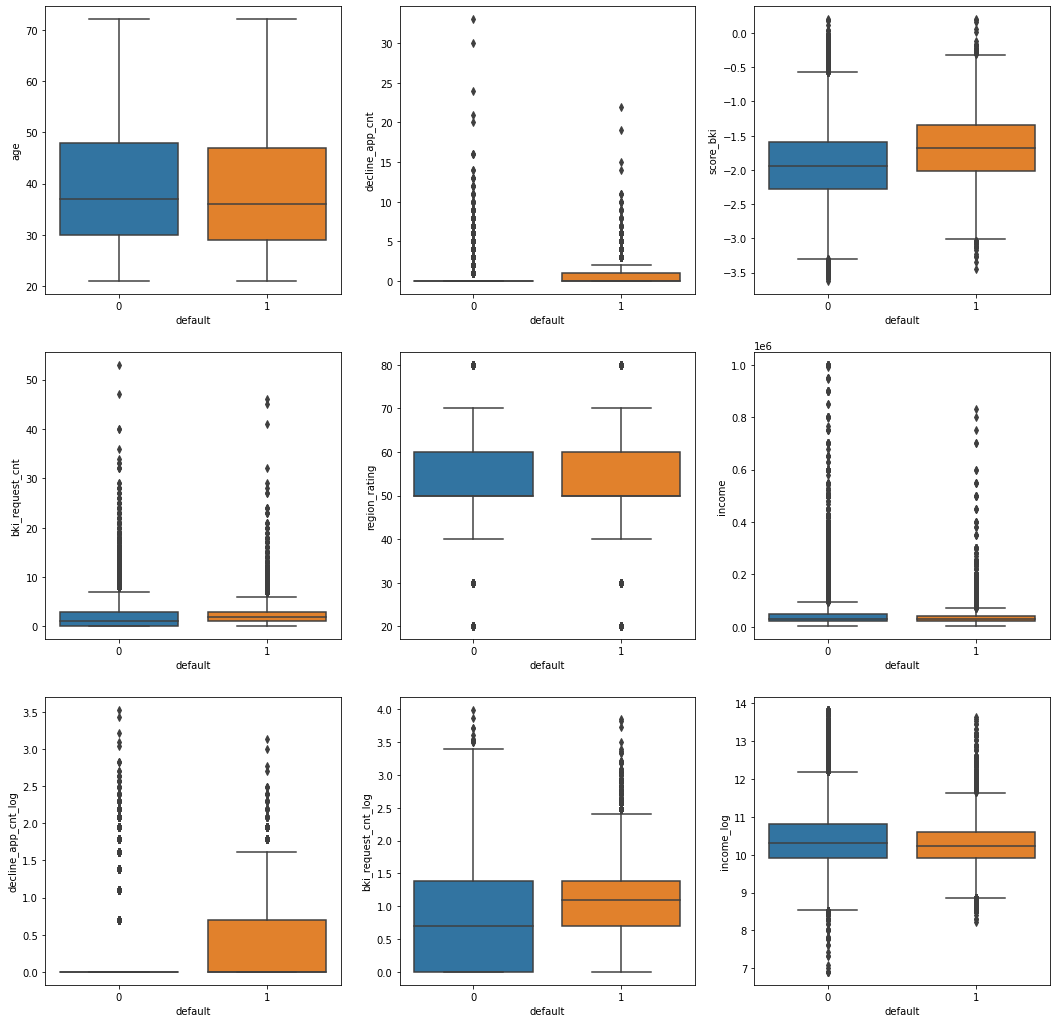

In [25]:
fig, axes = plt.subplots(3, 3, figsize=(18, 18))
axes = axes.flatten()
for i in range(len(num_cols)):
    sns.boxplot(x="default", y=num_cols[i], data=data[data["default"]>=0], orient="v", ax=axes[i])
# видим, например, что у "хороших" клиентов в прошлом обычно не было отказов на выдачу кредитов
# также у них более низкий скоринговый балл и меньше запросов в БКИ



In [26]:
# Работа с выбросами¶
# Классический подход определяет многие данные как выбросы. Попробуем понять, действительно ли это выбросы.
for col in num_cols:
    check_outliers(col, data)

В признаке 'age' выбросов нет

Количество выбросов в признаке 'decline_app_cnt': 18677
Границы выбросов: [0.0, 0.0]

Количество выбросов в признаке 'score_bki': 518
Границы выбросов: [-3.299251946250001, -0.5290698762499992]

Количество выбросов в признаке 'bki_request_cnt': 2636
Границы выбросов: [-4.5, 7.5]

Количество выбросов в признаке 'region_rating': 17917
Границы выбросов: [35.0, 75.0]

Количество выбросов в признаке 'income': 7000
Границы выбросов: [-22000.0, 90000.0]

Количество выбросов в признаке 'decline_app_cnt_log': 18677
Границы выбросов: [0.0, 0.0]

Количество выбросов в признаке 'bki_request_cnt_log': 15
Границы выбросов: [-2.0794415416798357, 3.465735902799726]

Количество выбросов в признаке 'income_log': 2609
Границы выбросов: [8.590378193705899, 12.092136480586621]



In [27]:
# decline_app_cnt
dac = data["decline_app_cnt"]
dac.mean(), dac.max()
# максимальное значение признака в сто раз больше среднего

(0.2732051421723499, 33)

In [28]:
borders(dac)

(0.0, 0.0)

In [29]:
dac.value_counts()

0     91471
1     12500
2      3622
3      1365
4       606
5       255
6       156
7        58
8        37
9        29
10       16
11       10
12        5
13        4
14        3
16        3
21        1
30        1
20        1
19        1
22        1
33        1
15        1
24        1
Name: decline_app_cnt, dtype: int64

In [30]:
# Стандартный подход говорит нам, что в этом признаке всё, кроме нулей - выбросы. Если мы заменим всё на нули, то признак потеряет какую-либо ценность для модели. Потому подойдём к выбросам умнее, сделав из этого признака бинарный (у нас также останется логарифмированный вариант признака): 0 - не было отказов, 1 - были.
import warnings
warnings.simplefilter("ignore")
dac[dac >= 1] = 1
num_cols.remove("decline_app_cnt")

In [31]:
data["decline_app_cnt"].value_counts()
# заметим, что мы изменили исходные данные (как и хотели)

0    91471
1    18677
Name: decline_app_cnt, dtype: int64

In [32]:
# 2. Бинарные признаки
#     sex - пол клиента
#     car - флаг наличия машины
#     car_type - флаг машины-иномарки
#     good_work - флаг наличия "хорошей" работы
#     foreign_passport - флаг наличия иностранного паспорта
bin_cols = ["sex", "car", "car_type", "good_work", "foreign_passport"] 
# целевая переменная "default" и изменённая "decline_app_cnt" также являются бинарными

In [33]:
for col in bin_cols:
    print(data[col].value_counts())

F    61836
M    48312
Name: sex, dtype: int64
N    74290
Y    35858
Name: car, dtype: int64
N    89140
Y    21008
Name: car_type, dtype: int64
0    91917
1    18231
Name: good_work, dtype: int64
N    93721
Y    16427
Name: foreign_passport, dtype: int64


In [34]:
!pip install -U scikit-learn #&>0
# обновим sklearn, это нужно для поддержки HalvingGridSearchCV
# если вы работаете в jupyter, этот шаг не требуется

     |████████████████████████████████| 24.8 MB 910 kB/s 
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 0.23.2
    Uninstalling scikit-learn-0.23.2:
      Successfully uninstalled scikit-learn-0.23.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pdpbox 0.2.1 requires matplotlib==3.1.1, but you have matplotlib 3.4.3 which is incompatible.
hypertools 0.7.0 requires scikit-learn!=0.22,<0.24,>=0.19.1, but you have scikit-learn 1.0.2 which is incompatible.


In [35]:
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder
enc = LabelEncoder()
for col in bin_cols:
    data[col] = enc.fit_transform(data[col])

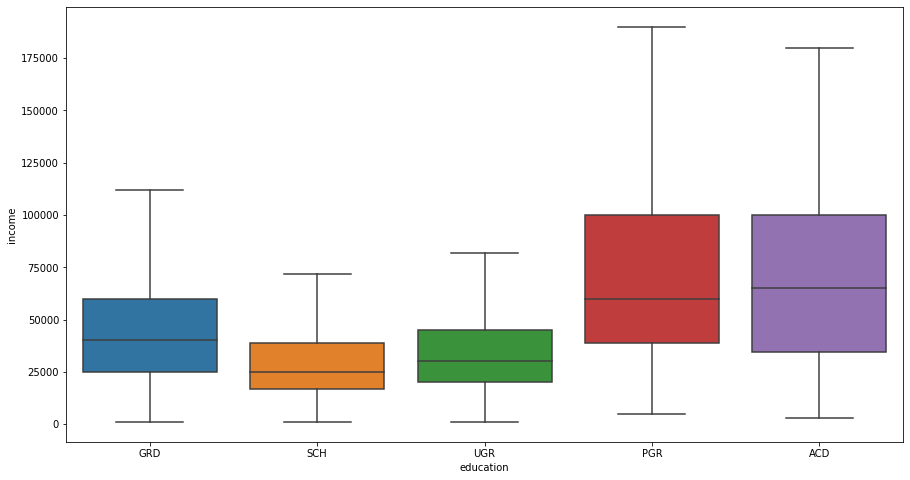

In [36]:
# 3. Категориальные признаки¶
#     education - уровень образования
#     home_address - категория домашнего адреса
#     work_address - категория рабочего адреса
#     sna - связь заемщика с клиентами банка
#     first_time - давность наличия информации о клиенте
cat_cols = ["education", "home_address", "work_address", "sna",  "first_time"]
plt.figure(figsize=(15, 8))
sns.boxplot(x="education", y="income", data=data, showfliers=False);
# посмотрим, влияет ли уровень образования на доход

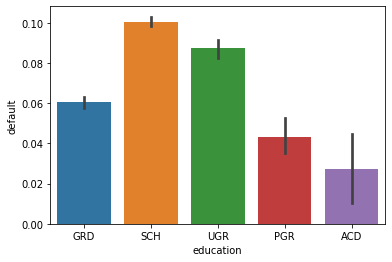

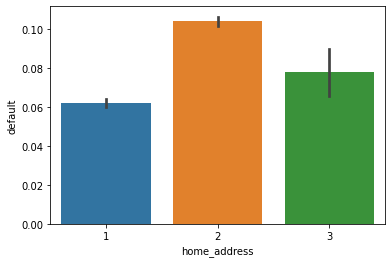

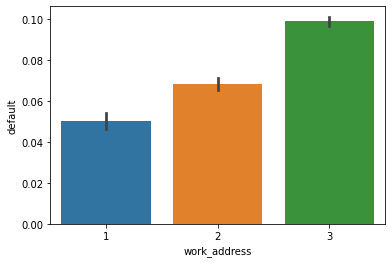

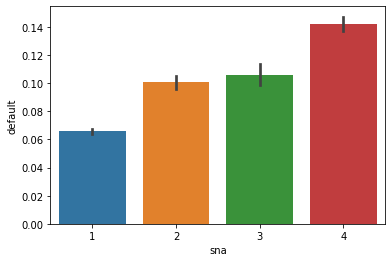

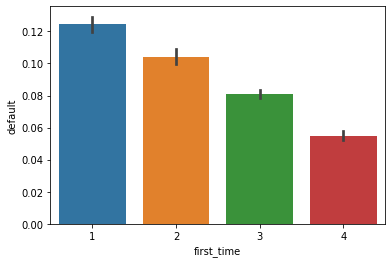

In [37]:
for col in cat_cols:
    sns.barplot(x=col, y="default", data=data[data["default"] >= 0])
    plt.show();
# видим, что клиенты с высшим образованием в среднем надёжнее
# а признаки work_address, sna и first_time можно расссматривать как "ординальные"

In [38]:
# поменяем классы 2 и 3 для признака home_address, чтобы исправить тренд
def swap(x):
    if x == 2:
        return 3
    if x == 3:
        return 2
    return x

data["home_address"] = data["home_address"].apply(swap)

In [39]:
data["has_degree"] = data["education"].apply(lambda x: 1 if x in ["PGR", "ACD"] else 0)
bin_cols.append("has_degree")

In [40]:
ed = pd.crosstab(data[data.default >= 0].education, data[data.default >= 0].default, normalize='index').iloc[:, 1]
data.education = data.education.map(ed)

In [41]:
new = pd.DataFrame(OneHotEncoder(sparse=False).fit_transform(data[cat_cols].values)).astype(int)
data = pd.concat([data.drop(cat_cols, axis=1), new], axis=1)

In [42]:
#  app_date
data["app_date"]
# дата в неудобном формате, преобразуем её
from datetime import datetime
data["app_date"] = data["app_date"].apply(lambda x: datetime.strptime(x, '%d%b%Y').timestamp()).astype(int)

In [43]:
# Feature engineering
data["bki_age_region"] = data["score_bki"] * data["region_rating"] / data["age"]

mean_income = data.groupby("age")["income"].mean().to_dict()
data["mean_income"] = data["age"].map(mean_income)

max_income = data.groupby("age")["income"].max().to_dict()
data["max_income"] = data["age"].map(max_income)

data["normalized_income"] = abs(data.income - data.mean_income) / data.max_income

mean_income_reg = data.groupby('region_rating')['income'].mean().to_dict()
data['mean_income_region'] = data['region_rating'].map(mean_income_reg)

mean_bki_age = data.groupby('age')['bki_request_cnt'].mean().to_dict()
data['mean_requests_age'] = data['age'].map(mean_bki_age)

mean_bki_inc = data.groupby('income')['bki_request_cnt'].mean().to_dict()
data['mean_requests_income'] = data['income'].map(mean_bki_inc)

num_cols = ["age", "decline_app_cnt", "score_bki", 
            "bki_request_cnt", "region_rating", "income", 
            "app_date", "bki_age_region", "mean_income",
            "max_income", "normalized_income", "mean_income_region",
            "mean_requests_age", "mean_requests_income"]
# обновим список численных переменных

# отнормируем признаки
data[num_cols] = pd.DataFrame(StandardScaler().fit_transform(data[num_cols]), columns=num_cols)

In [44]:
#  Корреляционная матрица
corr = data.drop("train", axis=1).corr()
up = corr.where(np.triu(np.ones(corr.shape), k=1).astype(bool)) 
for i in up.index:
    for col in up.columns:
        if i != col and abs(up.loc[i, col]) > 0.7:
                print(f"Признаки {i} и {col} имеют корреляцию {up.loc[i, col]:.3f}")


Признаки decline_app_cnt и decline_app_cnt_log имеют корреляцию 0.927
Признаки bki_request_cnt и bki_request_cnt_log имеют корреляцию 0.895
Признаки region_rating и mean_income_region имеют корреляцию 0.917
Признаки income и income_log имеют корреляцию 0.778
Признаки income и normalized_income имеют корреляцию 0.800
Признаки has_degree и 1 имеют корреляцию 0.929
Признаки 2 и 4 имеют корреляцию -0.722
Признаки 5 и 7 имеют корреляцию -0.966
Признаки 5 и 10 имеют корреляцию -0.820
Признаки 7 и 10 имеют корреляцию 0.795
Признаки 9 и 10 имеют корреляцию -0.777


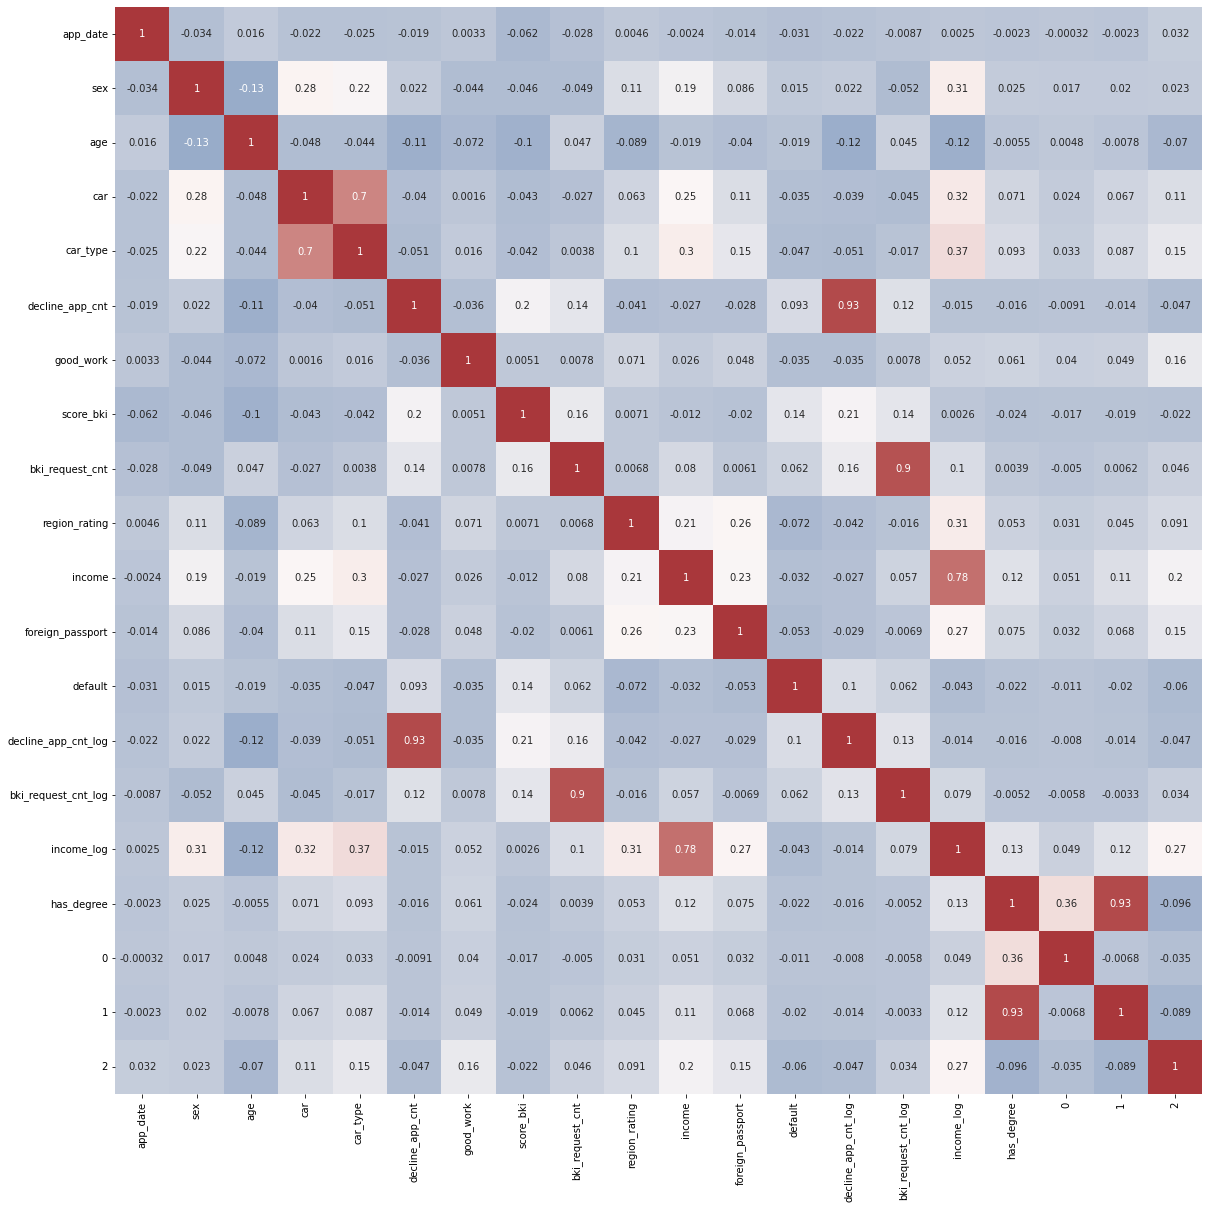

In [45]:
plt.rcParams['figure.figsize'] = 20, 20
sns.heatmap(corr.iloc[:20, :20], cmap='vlag', annot=True, vmin = -0.5, cbar=False, square=True); 

In [46]:
determinant = np.prod(np.linalg.eig(data.corr())[0])
print(f"Determinant of the matrix is {determinant:.100f}")
# детерминант маленький, и это не радует

Determinant of the matrix is 0.0000000000000000000000000000000000000000000000000000000000000000000000000000000000000000004033552411


In [47]:
drop = features_to_drop(data.drop("train", axis=1), cut=.85)
# найдём признаки, скоррелированные сильнее 0.85 по модулю
drop

['bki_request_cnt',
 'mean_income_region',
 'decline_app_cnt_log',
 'has_degree',
 5]

In [48]:
data.drop(drop, axis=1, inplace=True)
determinant = np.prod(np.linalg.eig(data.corr())[0])
print(f"Determinant of the matrix is {determinant:.100f}")
# стало чуть лучше :,)

Determinant of the matrix is 0.0000000000000000000000000000000000000000000000000000000000003034739043185576833041079527774154568072


In [49]:
#  Подготовка данных и обучение модели
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import train_test_split, HalvingGridSearchCV
from sklearn.linear_model import LogisticRegression

train_df = data.query("train == 1").drop(["train"], axis=1)
test_df = data.query("train == 0").drop(["train", "default"], axis=1)

X = train_df.drop(["default"], axis=1).values
y = train_df["default"].values

X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=.2, random_state=100)

lr = LogisticRegression(max_iter=1000, random_state=100)

lr.fit(X_train, y_train)
probs = lr.predict_proba(X_valid)[:, 1]

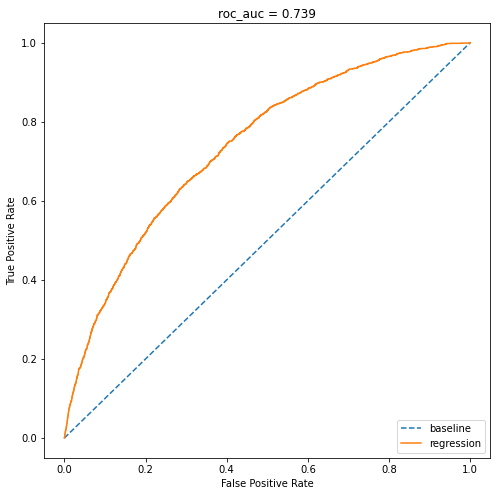

In [50]:
from sklearn.metrics import roc_auc_score, roc_curve, f1_score, \
    confusion_matrix, ConfusionMatrixDisplay, precision_recall_curve

plt.rcParams["figure.figsize"] = 8, 8
fpr, tpr, _ = roc_curve(y_valid, probs)
roc_auc = roc_auc_score(y_valid, probs)

plt.plot([0, 1], label="baseline", linestyle="--")
plt.plot(fpr, tpr, label="regression")
plt.title(f"roc_auc = {roc_auc:0.3f}")
plt.ylabel("True Positive Rate")
plt.xlabel("False Positive Rate")
plt.legend(loc="lower right");

In [51]:
pred = lr.predict(X_valid)
f1_score(pred, y_valid)
# очень низкий f-score, посмотрим матрицу ошибок

0.05893909626719057

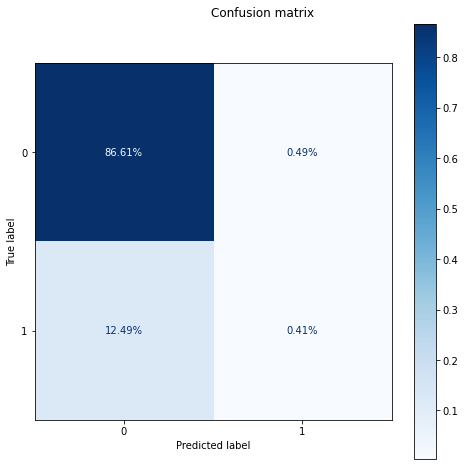

In [52]:
cm = confusion_matrix(y_valid, pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm/np.sum(cm), display_labels=lr.classes_) # или confusion_matrix=cm
disp.plot(cmap="Blues", values_format=".2%") # или values_format=".0f"
plt.suptitle("Confusion matrix", x=.52, y=.91);
# всё понятно, модель считает >99% клиентов надёжными

In [53]:
f_score, thresholds = calc_f_score(y_valid, probs)
best_f_score = max(f_score)
threshold = thresholds[np.argmax(f_score)]
print(f"threshold = {threshold}\nbest_f_score = {best_f_score}")

threshold = 0.16398578430513455
best_f_score = 0.36454561131229524


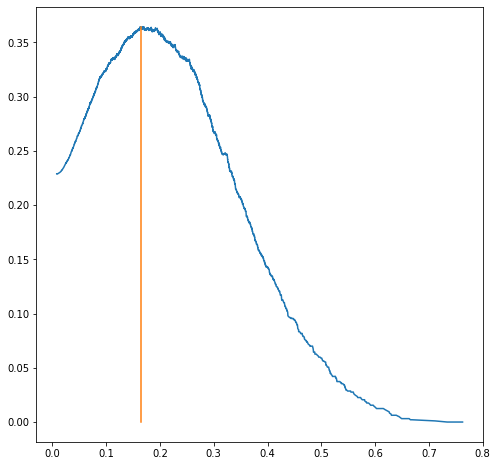

In [54]:
plt.plot(thresholds, f_score)
plt.plot(np.array([threshold] * 1000), np.linspace(0, best_f_score, 1000));

In [55]:
# Порог дефолта выбрали сильно меньше 0.5, иначе получалось, что одобряли кредиты всем. Да, мы отсекаем больше "хороших" клиентов, но зато меньше ошибаемся в "плохих". Такой порог позволяет максимизировать f_score на тестовых данных, однако не гарантирует, что и на новых метрика тоже будет максимальной. Посмотрим на матрицу ошибок ещё раз.
probs[probs >= threshold] = 1
probs[probs < threshold] = 0

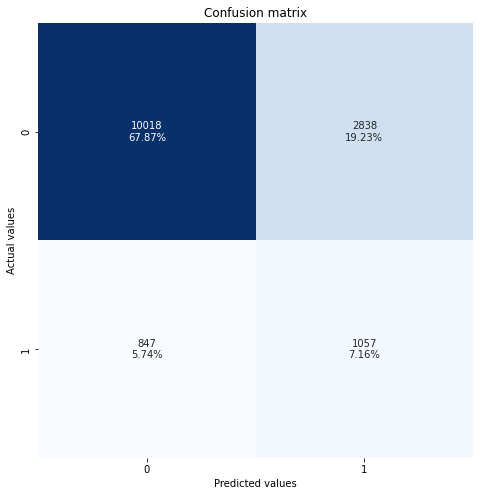

In [56]:
cm = confusion_matrix(y_valid, probs)
X = [str(i) for i in cm.flatten()]
Y = [f"{i:.2%}" for i in cm.flatten() / np.sum(cm)]
labels = np.asarray([x+"\n"+y for x, y in zip(X, Y)]).reshape(2, -1)
ax = sns.heatmap(cm, annot=labels, cbar=False, fmt='', cmap='Blues', square=True)
ax.set_title("Confusion matrix")
ax.set_xlabel("Predicted values")
ax.set_ylabel("Actual values");
# мы понизили порог дефолта и теперь вычисляем половину "плохих" клиентов (однако теряем и "хороших")

In [57]:
# Подбор гиперпараметров
# Нас интересуют следующие гиперпараметры класса LogisticRegression из библиотеки sklearn:
#     penalty: тип регуляризации
#     C: обратная сила регуляризации
#     solver: алгоритм решения задачи оптимизации (различные алгоритмы совместимы с разными penalty)
#     tol: чувствительность критерия остановки
lr = LogisticRegression(class_weight="balanced", warm_start=True, random_state=100)
# warm_start=True сэкономит нам время при подборе гиперпараметров
# ввиду несбалансированости классов, зададим class_weight="balanced"

param_grid = [{"solver": ["newton-cg", "lbfgs", "sag", "saga", "liblinear"],
               # здесь будет использоваться penalty="l2" - оно стоит по умолчанию
              "tol": np.geomspace(10**-6, 10**-2, 5),
               "C": np.geomspace(10**-4, 10**4, 9)},
              {"solver": ["saga", "liblinear"],
               "penalty": ["l1"],
               "tol": np.geomspace(10**-6, 10**-2, 5),
               "C": np.geomspace(10**-4, 10**4, 13)},
              {"solver": ["newton-cg", "lbfgs", "sag"],
               "penalty": ["none"],
               "tol": np.geomspace(10**-6, 10**-2, 5)}]
# зададим сетку поиска гиперпараметров, учитывая, что различные алгоритмы совместимы с разными регуляризациями
searcher = HalvingGridSearchCV(estimator=lr, param_grid=param_grid, min_resources="smallest",
                               scoring="f1", factor=2, cv=3)


In [58]:
start = datetime.now()
searcher.fit(X_train, y_train)
end = datetime.now()
end - start

datetime.timedelta(seconds=18, microseconds=855423)

In [59]:
searcher.best_estimator_

LogisticRegression(C=0.01, class_weight='balanced', random_state=100,
                   solver='saga', tol=0.001, warm_start=True)

In [60]:
searcher.best_estimator_

LogisticRegression(C=0.01, class_weight='balanced', random_state=100,
                   solver='saga', tol=0.001, warm_start=True)

In [61]:
y_pred = searcher.predict(X_valid)
f1_score(y_pred, y_valid)

0.34372908579842054

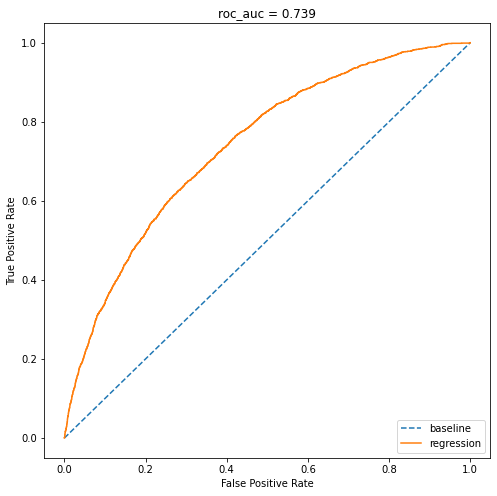

In [62]:
probs = searcher.predict_proba(X_valid)[:, 1]
plt.rcParams["figure.figsize"] = 8, 8
fpr, tpr, _ = roc_curve(y_valid, probs)
roc_auc = roc_auc_score(y_valid, probs)

plt.plot([0, 1], label="baseline", linestyle="--")
plt.plot(fpr, tpr, label="regression")
plt.title(f"roc_auc = {roc_auc:0.3f}")
plt.ylabel("True Positive Rate")
plt.xlabel("False Positive Rate")
plt.legend(loc="lower right");

In [63]:
f_score, thresholds = calc_f_score(y_valid, probs)
best_f_score = max(f_score)
threshold = thresholds[np.argmax(f_score)]
print(f"threshold = {threshold:.5f}\nbest_f_score = {best_f_score:.5f}")

threshold = 0.58460
best_f_score = 0.36464


In [64]:
# Финальное предсказание
# Использование лишь подбора гиперпараметров не помогло добиться лучшего f_score. Лучшая метрика была достигнута с помощью подбора порогового значения дефолта (вручную написанная функция calc_f_score), просто же с помощью "лучшей", по мнению HalvingGridSearchCV, модели удалось получить метрику почти на пару сотых ниже
y_pred = searcher.predict_proba(test_df)[:, 1]
y_pred[y_pred >= threshold] = 1
y_pred[y_pred < threshold] = 0 
result = pd.DataFrame(data={'client_id': test['client_id'], 'default': y_pred}).astype(int)
result.to_csv('./submission.csv', index=False)

In [65]:
# Возможно, следовало попробовать другие модели (вроде Catboost), однако данное соревнование в первую очередь направлено на знакомство логистической регрессией. Также я не попробовал under- и oversampling, не особо работал с выбросами, не анализировал важность признаков (за исключением метода корелляций). Вместо использования HalvingGridSearchCV можно было попробовать optuna.

In [66]:
# num_cols = ['age', 'score_bki', 'decline_app_cnt', 'score_bki', 'bki_request_cnt', 'income']
# cat_cols = ['education', 'first_time', 'sna', 'work_address', 'home_address', 'region_rating']
# bin_cols = ['sex', 'car', 'car_type', 'good_work', 'foreign_passport']

In [67]:
# data['default'].value_counts(ascending=True).plot(kind='barh')

In [68]:
# data.drop(['client_id','app_date',], axis = 1, inplace=True)

In [69]:
# data = pd.get_dummies(data, columns=['education'], dummy_na=True)

In [70]:
# from sklearn import preprocessing
# le = preprocessing.LabelEncoder()

# for column in bin_cols:
#     data[column] = le.fit_transform(data[column])
    
# columns = ['first_time', 'sna', 'work_address', 'home_address', 'region_rating']

# for column in columns:
#     data[column] = le.fit_transform(data[column])

In [71]:
# data.info()

In [72]:
# data

In [73]:
# # Теперь выделим тестовую часть
# train_data = data.query('sample == 1').drop(['sample'], axis=1)
# test_data = data.query('sample == 0').drop(['sample', 'default'], axis=1)

# y = train_data['default'].values  # наш таргет
# X = train_data.drop(['default'], axis=1)

In [74]:
# # Воспользуемся специальной функцие train_test_split для разбивки тестовых данных
# from sklearn.model_selection import train_test_split

# # выделим 20% данных на валидацию (параметр test_size)
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [75]:
# # проверяем
# X_train.shape, X_test.shape, y_train.shape, y_test.shape

In [76]:
# # Импортируем необходимые библиотеки:
# from sklearn.linear_model import LogisticRegression # инструмент для создания и обучения модели
# from sklearn import metrics # инструменты для оценки точности модели

In [77]:
# logreg = LogisticRegression(solver='liblinear', max_iter=1000)
# logreg.fit(X_train, y_train)
# y_pred = logreg.predict(X_test)

In [78]:
# from sklearn.metrics import classification_report
# classification_report = classification_report(y_test, y_pred)
# print(classification_report)

In [79]:
# # если качество нас устраивает, обучаем финальную модель на всех обучающи данных
# logreg_final = LogisticRegression(solver='liblinear', max_iter=1000)
# logreg_final.fit(X, y)

In [80]:
# predict_submission = logreg_final.predict(test_data)

In [81]:
# sample_submission['default'] = predict_submission
# sample_submission.to_csv('submission.csv', index=False)
# sample_submission.head(10)

In [82]:
# sample_submission.describe()

In [83]:
!kaggle competitions submit -c sf-scoring -f ssubmission.csv -m "Message"
# !kaggle competitions submit your-competition-name -f submission.csv -m 'My submission message'

Traceback (most recent call last):
  File "/opt/conda/bin/kaggle", line 5, in <module>
    from kaggle.cli import main
  File "/opt/conda/lib/python3.7/site-packages/kaggle/__init__.py", line 23, in <module>
    api.authenticate()
  File "/opt/conda/lib/python3.7/site-packages/kaggle/api/kaggle_api_extended.py", line 166, in authenticate
    self.config_file, self.config_dir))
OSError: Could not find kaggle.json. Make sure it's located in /root/.kaggle. Or use the environment method.
